# import 

In [11]:
from astropy.io import fits 
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pylab import cm

%matplotlib inline
%config InlineBackend.figure_format='svg'
# Edit the font, font size, and axes width
mpl.rcParams['font.family'] = 'Avenir'
plt.rcParams['font.size'] = 18
plt.rcParams['axes.linewidth'] = 2

In [12]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.visualization import hist
from astroML.datasets import fetch_imaging_sample, fetch_sdss_S82standards
from astroML.crossmatch import crossmatch_angular

In [13]:
from astropy.table import Table
import os
from collections import OrderedDict
from adjustText import adjust_text

# radio_loud_agn

In [4]:
radio_loud_agn=Table.read('/Users/brettlv/Downloads/CLAGN_statistic_plot/Source_lists/Radio-loud AGN in SDSS/J_MNRAS_362_9/table2.dat',
                      readme="/Users/brettlv/Downloads/CLAGN_statistic_plot/Source_lists/Radio-loud AGN in SDSS/J_MNRAS_362_9/ReadMe",
                      format="ascii.cds",)

In [5]:
radio_loud_agn

IDPlate,JD,IDFibre,RAdeg,DEdeg,z,SNVSS,Cl,SFIRST,Offset,Size,Type
,d,,deg,deg,,Jy,,Jy,arcsec,arcsec,
int64,int64,int64,float64,float64,float64,float64,int64,float64,float64,float64,str14
266,2451630,25,146.9561,-0.3423,0.1347,0.0963,1,0.101,1.26,4.64,Radio-loud AGN
266,2451630,90,146.1436,-0.7416,0.2039,0.0068,1,0.0025,0.46,5.88,Radio-loud AGN
266,2451630,119,146.73711,-0.2522,0.1305,0.0075,1,0.0043,0.51,2.39,Radio-loud AGN
266,2451630,141,146.37379,-0.3684,0.0529,0.0104,1,0.001,2.02,0.27,Radio-loud AGN
266,2451630,223,145.6012,-0.0014,0.1459,0.0054,1,0.0049,0.44,0.0,Star-forming
266,2451630,506,146.463,0.6387,0.0303,0.0052,1,0.0028,2.1,6.24,Star-forming
266,2451630,517,146.3736,0.2555,0.1292,0.0275,1,0.0269,0.33,1.77,Radio-loud AGN
266,2451630,543,146.80679,0.6656,0.0201,0.018,1,0.0131,0.78,10.89,Radio-loud AGN


# BAT_105m_Seyfert

In [24]:
BAT_105m_catalog_07jul2019=pd.read_csv('/Users/brettlv/Downloads/CLAGN_statistic_plot/Source_lists/BAT_105m_catalog_07jul2019.txt',
                                       delimiter="|",header=0,skiprows=1,)
#BAT_105m_catalog_07jul2019.columns

BAT_105m_catalog_07jul2019=BAT_105m_catalog_07jul2019[BAT_105m_catalog_07jul2019['                 TYPE'].notnull()]

BAT_105m_Seyfert=BAT_105m_catalog_07jul2019[BAT_105m_catalog_07jul2019['                 TYPE'].str.contains('Sy')]
BAT_105m_Seyfert=BAT_105m_Seyfert[BAT_105m_Seyfert['                 TYPE'].str.contains('candidate')==False]
BAT_105m_Seyfert=BAT_105m_Seyfert.reset_index(drop=True)

In [ ]:
dtype={'     RA':np.float64,'    DEC':np.float64}

In [7]:
BAT_105m_Seyfert.columns

Index(['    ', '             BAT_NAME', '     RA', '    DEC', '    SNR',
       '              COUNTERPART_NAME', '                     OTHER_NAME',
       ' CTPT_RA', 'CTPT_DEC', '    FLUX', ' FLUX_LO', ' FLUX_HI', 'CONTA',
       'GAMM', 'GAMM.1', 'GAMM.2', '  CHI_SQ_R', 'REDSHIF', '  LUM',
       'ASSOC_STREN', '        CL2', '                 TYPE'],
      dtype='object')

In [15]:
len(radio_loud_agn),len(BAT_105m_Seyfert)

(2712, 821)

In [29]:
min(BAT_105m_Seyfert['    DEC']),max(BAT_105m_Seyfert['    DEC'])

('  0.097', '-86.606')

In [30]:
min(stX[:, 1]),max(stX[:, 1])

(-86.60600000000001, 85.49799999999999)

In [28]:
min(radio_loud_agn['DEdeg']),max(radio_loud_agn['DEdeg'])

(-11.1889, 64.2878)

In [25]:
imX = np.empty((len(radio_loud_agn), 2), dtype=np.float64)
imX[:, 0] = radio_loud_agn['RAdeg']
imX[:, 1] = radio_loud_agn['DEdeg']

stX = np.empty((len(BAT_105m_Seyfert), 2), dtype=np.float64)
stX[:, 0] = pd.to_numeric(BAT_105m_Seyfert['     RA'])
stX[:, 1] = pd.to_numeric(BAT_105m_Seyfert['    DEC'])

In [27]:
stX

array([[ 2.28000e-01, -7.16400e+00],
       [ 4.45000e-01, -7.70000e+01],
       [ 6.13000e-01,  3.36500e+00],
       ...,
       [ 3.52031e+02,  8.83500e+00],
       [ 3.52624e+02, -2.47400e+00],
       [ 3.58983e+02,  2.55520e+01]])

In [43]:
# crossmatch catalogs
#max_radius = 1. / 3600  # 1 arcsec
#max_radius = 5  # 1 degree
max_radius = 20*60. / 3600  # 60 arcsec

dist, ind = crossmatch_angular(imX,stX, max_radius)
match = ~np.isinf(dist)# '~np.isinf' vs 'np.isinf'

dist_match = dist[match]
#dist_match *= 3600 #convert to arcsec
dist_match *= 60 #convert to arcmin



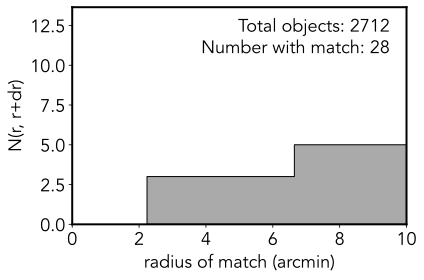

In [44]:
ax = plt.axes()
hist(dist_match, bins='knuth', ax=ax,
     histtype='stepfilled', ec='k', fc='#AAAAAA')
ax.set_xlabel('radius of match (arcmin)')
ax.set_ylabel('N(r, r+dr)')
ax.text(0.95, 0.95,
        "Total objects: %i\nNumber with match: %i" % (imX.shape[0],
                                                      np.sum(match)),
        ha='right', va='top', transform=ax.transAxes)
ax.set_xlim(0, 10)
plt.show()

In [45]:
from collections import Counter
ind_remove_rep=[]

for i in ind[match]:
    if i not in ind_remove_rep:
        ind_remove_rep.append(i)
        
ind_remove_rep=np.array(ind_remove_rep)        
a=Counter(ind[match])

a

([<matplotlib.axis.XTick at 0x125a3e520>,
 [Text(0, 0, 'Mrk 1310'),
  Text(1, 0, 'Mrk 382'),
  Text(2, 0, '2MASX J09043699+5536025'),
  Text(3, 0, 'SBS 0915+556'),
  Text(4, 0, 'MCG -02-08-014'),
  Text(5, 0, 'MCG +10-14-025'),
  Text(6, 0, 'Mrk 141'),
  Text(7, 0, 'Mrk 50'),
  Text(8, 0, 'UM 614'),
  Text(9, 0, 'LBQS 1344+0233'),
  Text(10, 0, 'Mrk 1392'),
  Text(11, 0, '2MASX J15064412+0351444'),
  Text(12, 0, '2MASX J16071388+4833266'),
  Text(13, 0, '2MASX J22505170-0854572'),
  Text(14, 0, 'Mrk 926'),
  Text(15, 0, 'Mrk 622'),
  Text(16, 0, '2MASX J08294266+4154366'),
  Text(17, 0, 'Mrk 110'),
  Text(18, 0, 'SBS 1318+605'),
  Text(19, 0, 'FBQS J083225.3+370736'),
  Text(20, 0, 'NGC 3718'),
  Text(21, 0, 'NGC 4102'),
  Text(22, 0, 'NGC 5506'),
  Text(23, 0, 'CGCG 291-028'),
  Text(24, 0, '2MASX J12055599+4959561'),
  Text(25, 0, '1RXS J170102.6+340409')])

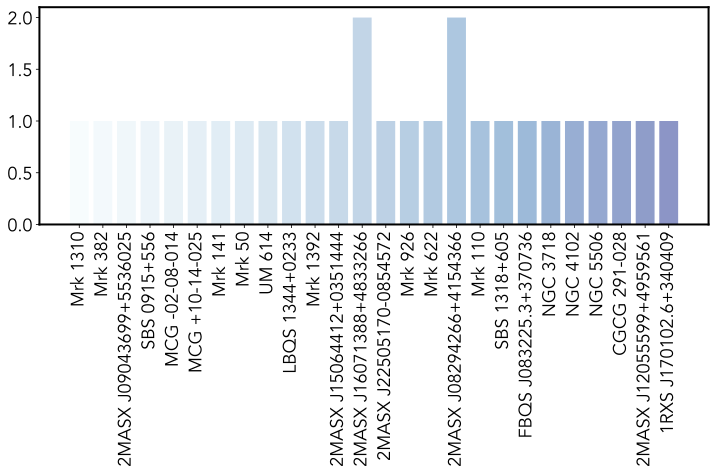

In [47]:
fig=plt.figure(figsize=(12,4))
ax=fig.add_subplot(111)

colors = plt.cm.BuPu(np.linspace(0, 0.5, len(ind_remove_rep)))

for index,i in enumerate(a):#index 
    plt.bar(index,a[i],color=colors[index])
    #print(index,i,a[i])
    
plt.xticks(np.arange(len(ind_remove_rep)),BAT_105m_Seyfert['              COUNTERPART_NAME'][ind_remove_rep[np.arange(len(ind_remove_rep))]].str.strip(),rotation=90)
#plt.title('within 5degree')
##plt.show()